In [7]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta







In [8]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [9]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [10]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [54]:

lookback = 13


df = getQuotes(frameM30, 2023, 12, 1)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1701369000,1.09105,1.09142,1.09031,1.09064,4753,9,0
1,1701370800,1.09064,1.09118,1.08933,1.08971,3183,9,0
2,1701372600,1.08971,1.08989,1.08878,1.08897,2560,9,0
3,1701374400,1.08898,1.08995,1.08895,1.08977,2193,9,0
4,1701376200,1.08977,1.08978,1.08833,1.08890,2196,9,0
...,...,...,...,...,...,...,...,...
331,1702310400,1.07632,1.07634,1.07443,1.07475,3978,8,0
332,1702312200,1.07474,1.07573,1.07435,1.07527,6908,8,0
333,1702314000,1.07527,1.07597,1.07442,1.07457,7190,8,0
334,1702315800,1.07457,1.07512,1.07414,1.07438,7120,8,0


In [55]:


## Calculating the fractal dimension index

def fractalDimensionIndex(df, lookback):
    for i in range(len(df)):

        # calculating N1
        sn1 = i - (2 * lookback)
        en1 = i - lookback
        maxn1v = 0
        minn1v = 0
        if sn1 > 0 and en1 > 0:
            maxn1v = max(df.iloc[sn1:en1]['high'])
            minn1v = min(df.iloc[sn1:en1]['low'])
        df.loc[i, 'n1_max'] = maxn1v
        df.loc[i, 'n1_min'] = minn1v
        df.loc[i, 'n1'] = (df.loc[i, 'n1_max'] - df.loc[i, 'n1_min']) / lookback

        # calculating N2
        sn2 = i - lookback
        en2 = i
        maxn2v = 0
        minn2v = 0
        if sn2 > 0 and en2 > 0:
            maxn2v = max(df.iloc[sn2:en2]['high'])
            minn2v = min(df.iloc[sn2:en2]['low'])
        df.loc[i, 'n2_max'] = maxn2v
        df.loc[i, 'n2_min'] = minn2v
        df.loc[i, 'n2'] = (df.loc[i, 'n2_max'] - df.loc[i, 'n2_min']) / lookback

        # calculating N3
        df.loc[i, 'n3_max'] = max(df.loc[i, 'n1_max'], df.loc[i, 'n2_max'])
        df.loc[i, 'n3_min'] = min(df.loc[i, 'n1_min'], df.loc[i, 'n2_min'])
        df.loc[i, 'n3'] = (df.loc[i, 'n3_max'] - df.loc[i, 'n3_min']) / (2 * lookback)

        # calculating fractional dimension index
        fdi = 0
        if (df.loc[i, 'n1'] > 0) and (df.loc[i, 'n2'] > 0) and (df.loc[i, 'n3'] > 0):
            fdi = ((np.log(df.loc[i, 'n1'] + df.loc[i, 'n2'])) - (np.log(df.loc[i, 'n3']))) / np.log(2)
        df.loc[i, 'fdi'] = fdi
        
        # calculating the alpha
        df.loc[i, 'alpha'] = np.exp(-4.6 * (df.loc[i, 'fdi'] - 1))

    return df[(2 * lookback) + 1:]






In [56]:

df = fractalDimensionIndex(df, lookback)
df

,time,open,high,low,close,tick_volume,spread,real_volume,n1_max,n1_min,n1,n2_max,n2_min,n2,n3_max,n3_min,n3,fdi,alpha
27,1701417600,1.09105,1.09106,1.09059,1.09069,1093,9,0,1.09118,1.08789,0.000253,1.09123,1.08908,0.000165,1.09123,1.08789,0.000128,1.703759,0.039270
28,1701419400,1.09069,1.09114,1.09067,1.09084,1380,9,0,1.08995,1.08789,0.000158,1.09123,1.08913,0.000162,1.09123,1.08789,0.000128,1.316735,0.232938
29,1701421200,1.09084,1.09108,1.09041,1.09080,1843,9,0,1.09006,1.08789,0.000167,1.09123,1.08978,0.000112,1.09123,1.08789,0.000128,1.116142,0.586108
30,1701423000,1.09080,1.09115,1.08942,1.08943,3633,9,0,1.09026,1.08789,0.000182,1.09123,1.08978,0.000112,1.09123,1.08789,0.000128,1.193725,0.410191
31,1701424800,1.08943,1.09026,1.08925,1.08960,4369,9,0,1.09090,1.08789,0.000232,1.09123,1.08942,0.000139,1.09123,1.08789,0.000128,1.529185,0.087663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,1702310400,1.07632,1.07634,1.07443,1.07475,3978,8,0,1.07735,1.07606,0.000099,1.07786,1.07511,0.000212,1.07786,1.07511,0.000106,1.554924,0.077875
332,1702312200,1.07474,1.07573,1.07435,1.07527,6908,8,0,1.07735,1.07528,0.000159,1.07786,1.07443,0.000264,1.07786,1.07443,0.000132,1.681223,0.043560
333,1702314000,1.07527,1.07597,1.07442,1.07457,7190,8,0,1.07705,1.07511,0.000149,1.07786,1.07435,0.000270,1.07786,1.07435,0.000135,1.634785,0.053933
334,1702315800,1.07457,1.07512,1.07414,1.07438,7120,8,0,1.07705,1.07511,0.000149,1.07786,1.07435,0.000270,1.07786,1.07435,0.000135,1.634785,0.053933


In [57]:

strongTrendIndices = []

for i in range(len(df)):
    if (df.iloc[i]['fdi'] < 1.30):
        strongTrendIndices.append(i)

print(strongTrendIndices)



[2, 3, 17, 18, 21, 22, 23, 24, 25, 26, 27, 77, 93, 94, 95, 96, 97, 110, 129, 130, 138, 139, 140, 182, 183, 184, 185, 187, 226, 227, 228, 256, 263, 264, 265, 266, 267, 287, 288]


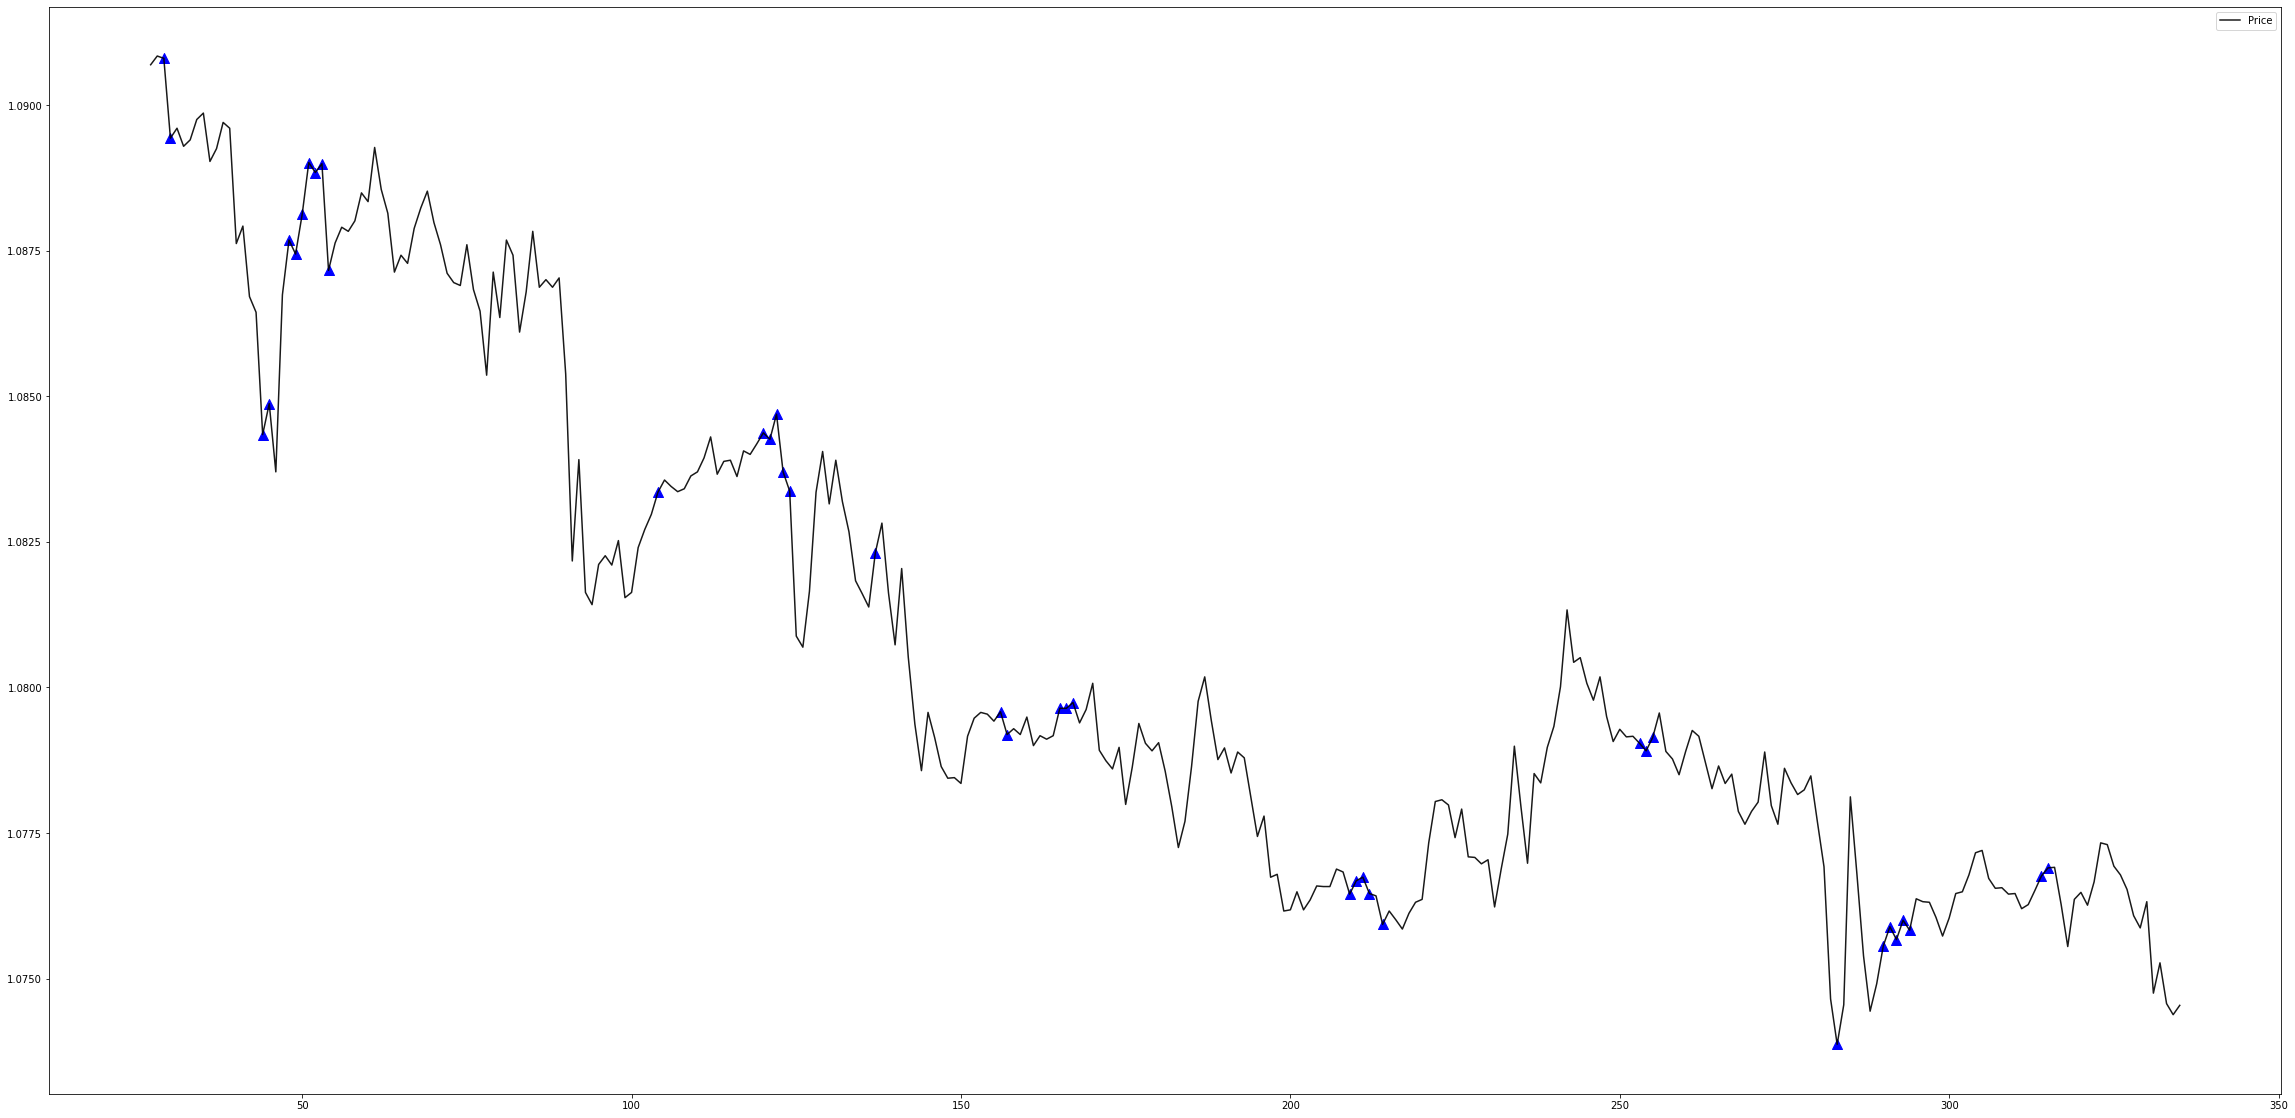

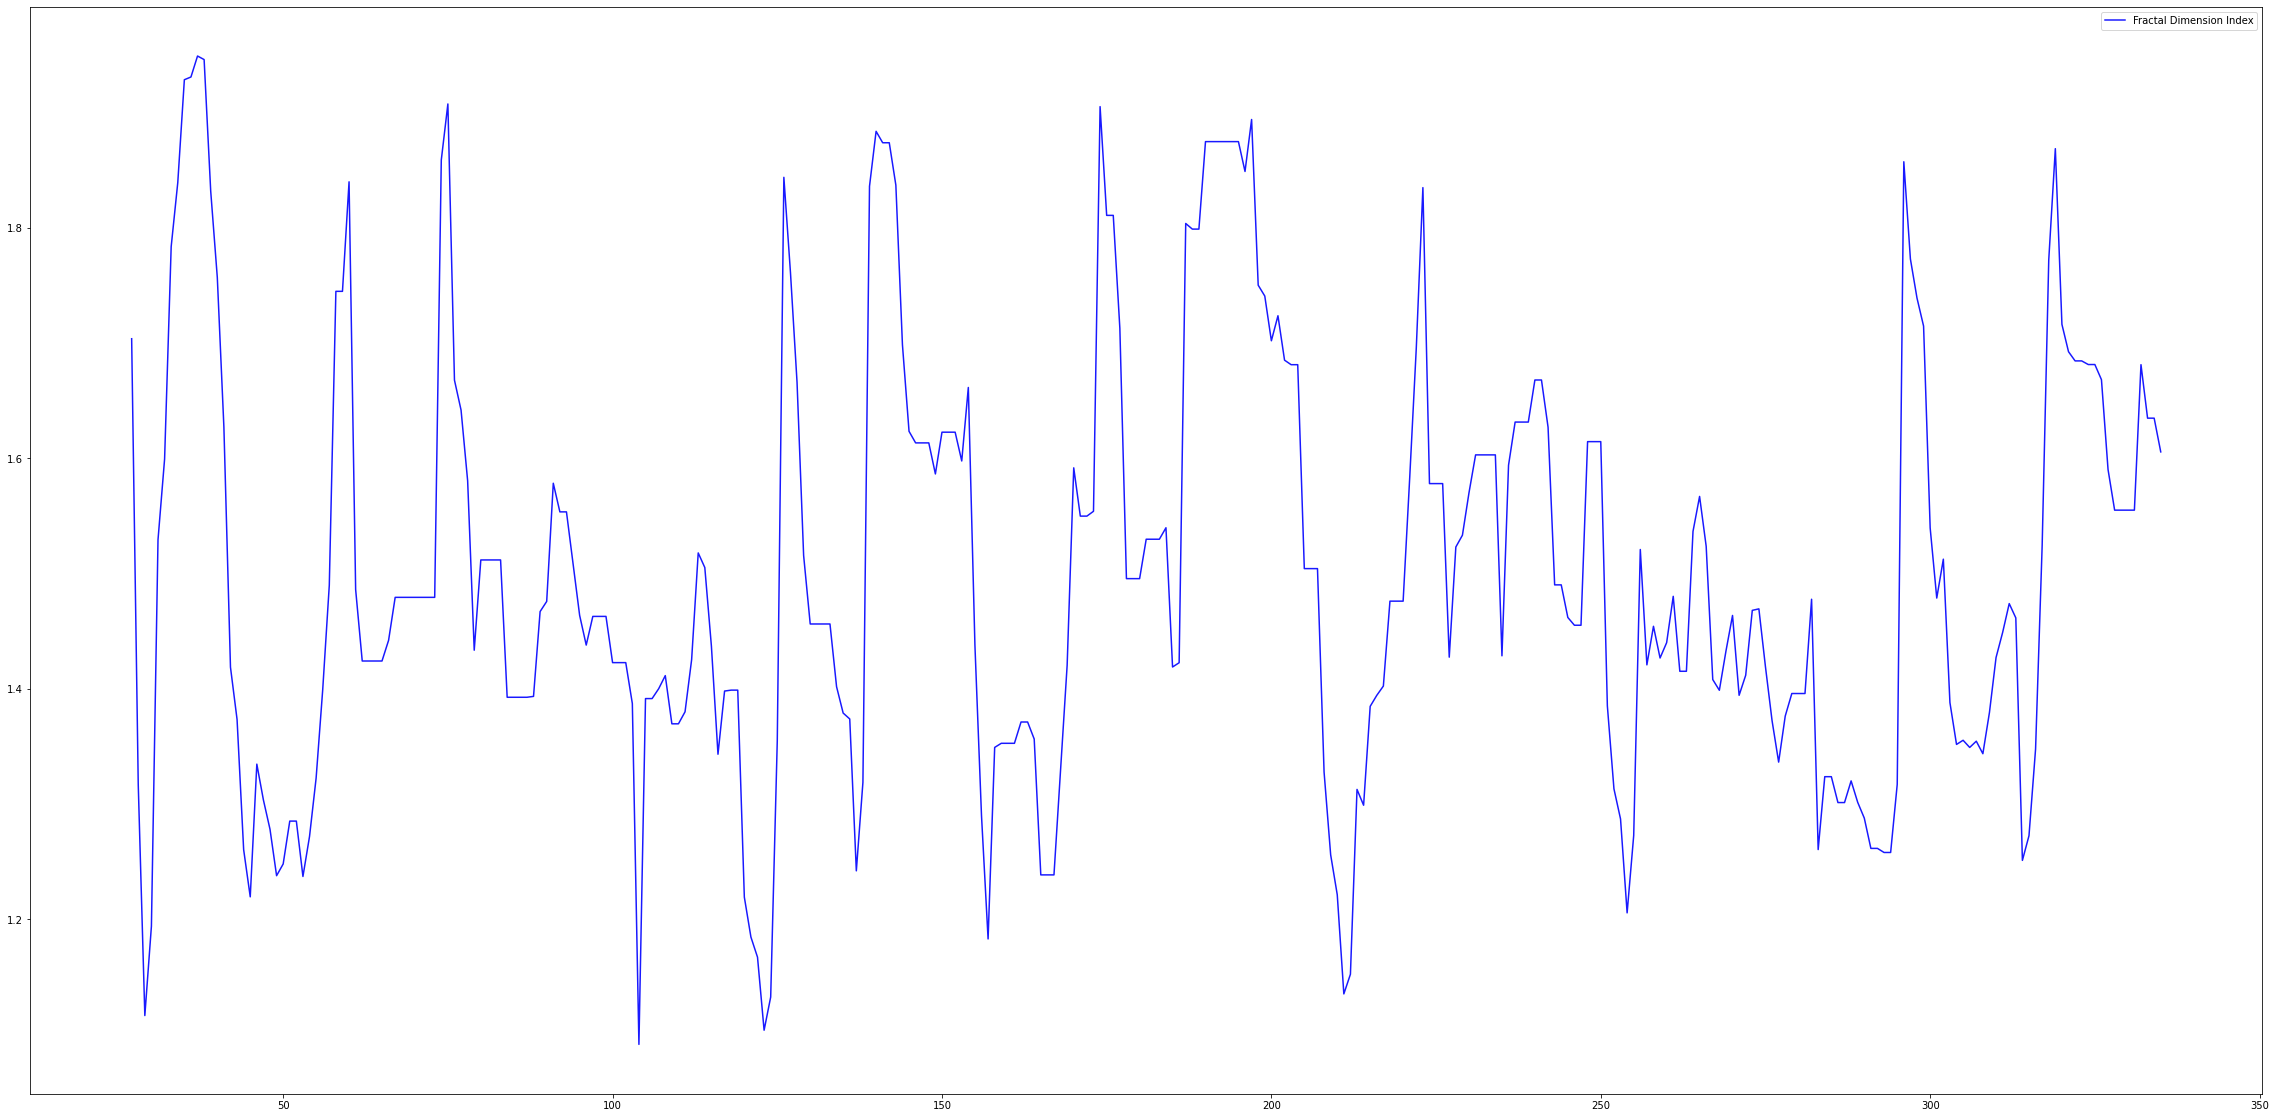

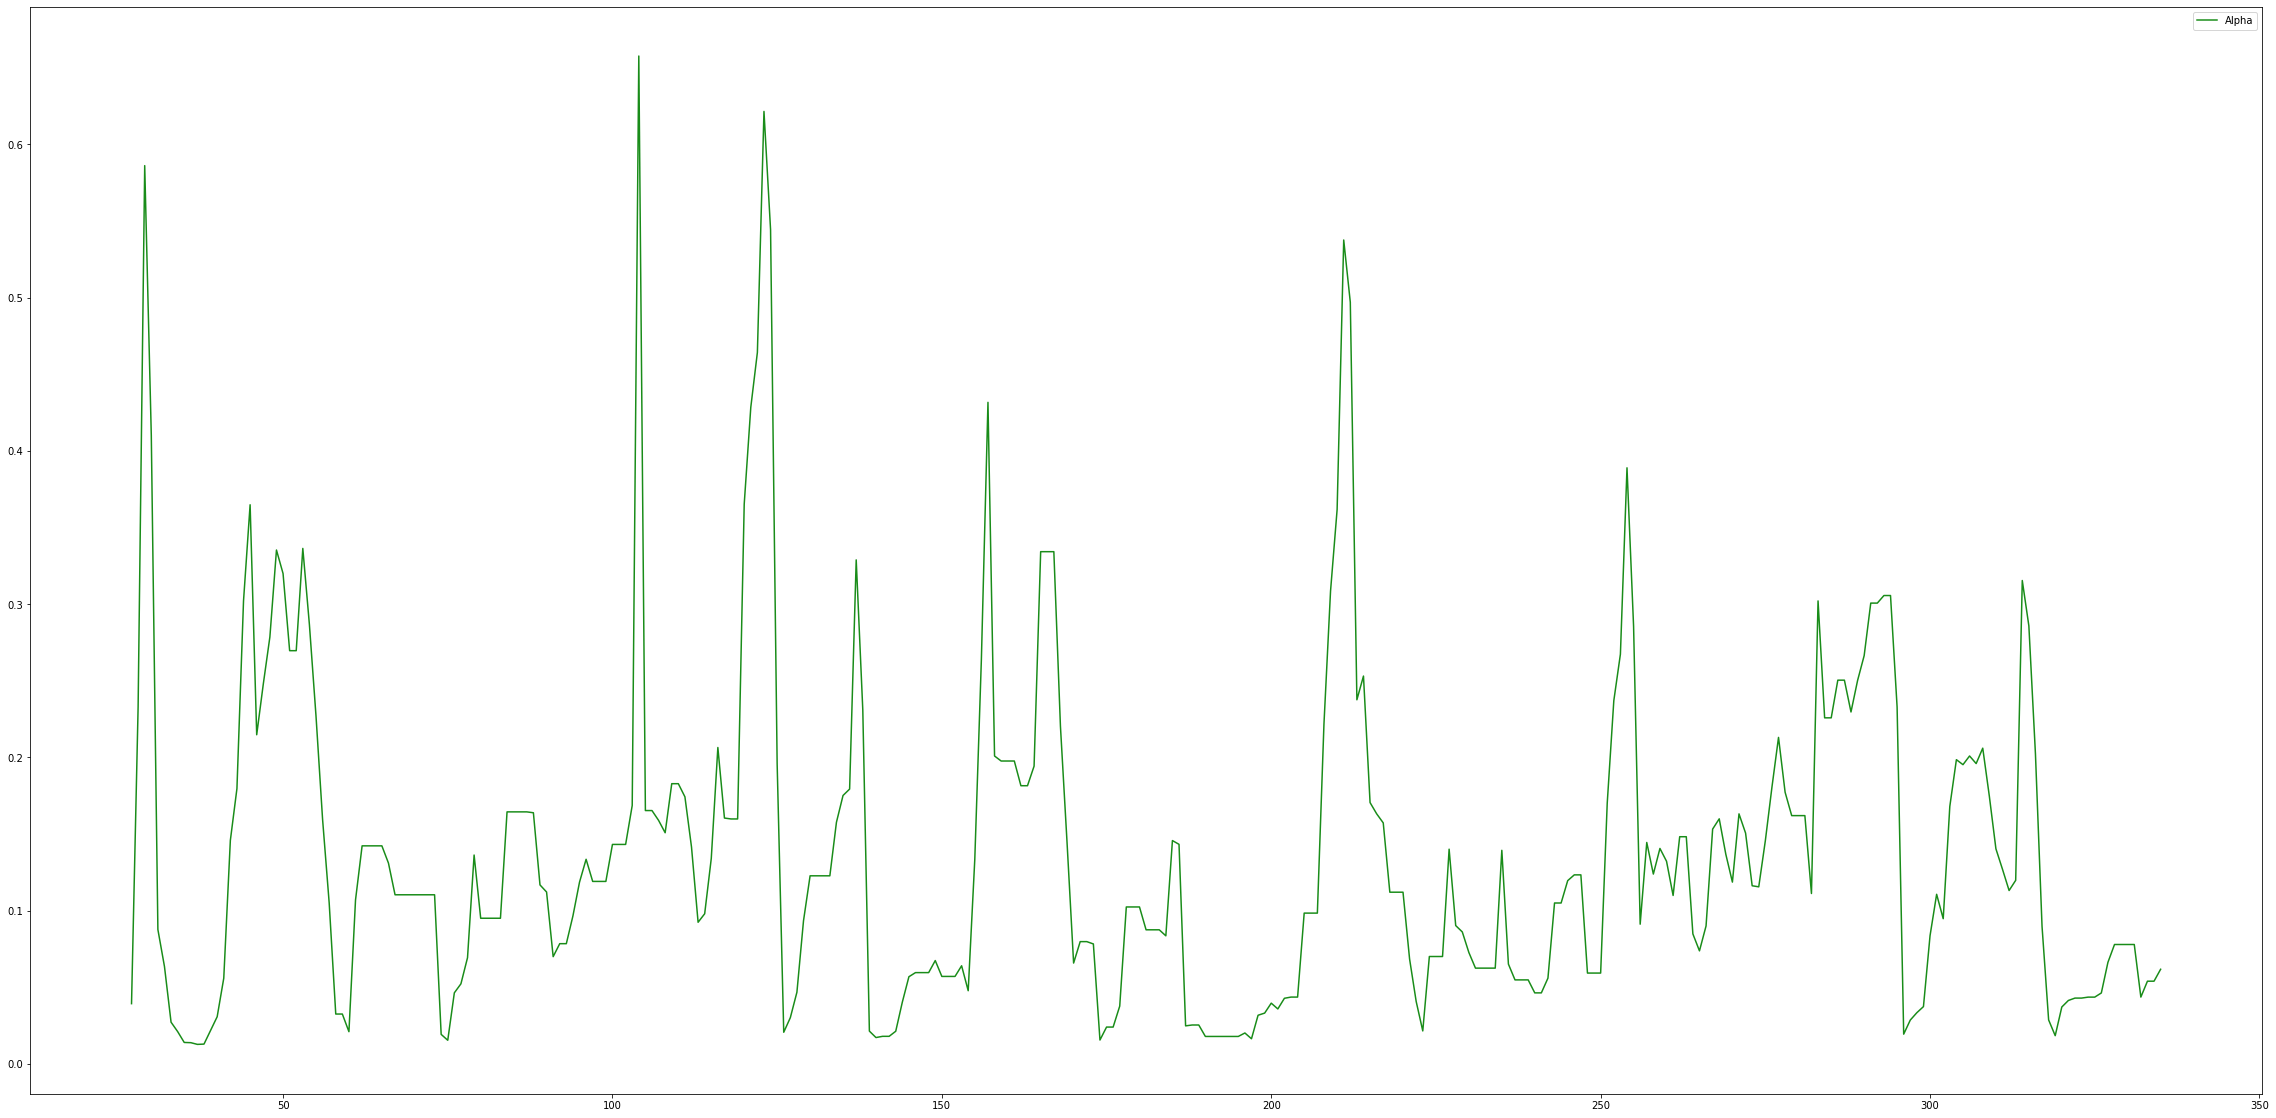

In [58]:

plt.figure(figsize = (40, 20))
plt.plot(df['close'], label='Price', c='black', alpha=0.9)
plt.scatter(df.iloc[strongTrendIndices].index, df.iloc[strongTrendIndices]['close'], marker = '^', color = 'blue', s = 100)
plt.legend()
plt.show()


plt.figure(figsize = (40, 20))
plt.plot(df['fdi'], label='Fractal Dimension Index', c='blue', alpha=0.9)
plt.legend()
plt.show()


plt.figure(figsize = (40, 20))
plt.plot(df['alpha'], label='Alpha', c='green', alpha=0.9)
plt.legend()
plt.show()


In [59]:
## Fix the code from here

# calculating FRAMA (fractal adaptive moving average)

def frama(df):
    pass

        